In [1]:
upstream = ['01-get']
product = None

In [2]:
# Parameters
upstream = {"01-get": {"nb": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/src/products/01-extract-pipeline.ipynb", "csv_file": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/src/data/house_prices.csv", "database": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/src/data/house_prices.duckdb"}}
product = {"nb": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/src/products/02-cleanup.ipynb", "clean_csv": "/home/luiscberrocal/PycharmProjects/hacktoberfest-2023/src/data/house_prices_clean.csv"}


In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(upstream['01-get']['csv_file'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [7]:
df.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [8]:
# Rename columns to snake case
renamed_mapping = {}
for c in df.columns:
    new_c_name = re.sub('[^0-9a-zA-Z_]+', '', c)
    renamed_mapping[c] = new_c_name.lower()

df = df.rename(columns=renamed_mapping)

In [9]:
# Convert price to dolllars 1 lac == 1,397
df['price'] = df['targetprice_in_lacs'] * 1_397

# Convert square_ft to square meters
df['area_m2'] = df['square_ft'] * 0.092903

In [10]:
df = df.drop(columns=['square_ft', 'targetprice_in_lacs'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   posted_by           29451 non-null  object 
 1   under_construction  29451 non-null  int64  
 2   rera                29451 non-null  int64  
 3   bhk_no              29451 non-null  int64  
 4   bhk_or_rk           29451 non-null  object 
 5   ready_to_move       29451 non-null  int64  
 6   resale              29451 non-null  int64  
 7   address             29451 non-null  object 
 8   longitude           29451 non-null  float64
 9   latitude            29451 non-null  float64
 10  price               29451 non-null  float64
 11  area_m2             29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [11]:
# Extracting cities from address
def get_city(value):
    parts = value.split(',')
    return parts[-1:][0]


# Too many cities, heatmap not working.
# df['city'] = df['address'].apply(get_city)

# df['city'].value_counts()

In [12]:
df = df.drop(columns=['address'])

In [13]:
df['posted_by'].value_counts()

posted_by
Dealer     18291
Owner      10538
Builder      622
Name: count, dtype: int64

In [14]:
df['bhk_or_rk'].value_counts()

bhk_or_rk
BHK    29427
RK        24
Name: count, dtype: int64

In [15]:
# df = pd.get_dummies(df, columns=['posted_by', 'bhk_or_rk', 'city'])
df = pd.get_dummies(df, columns=['posted_by', 'bhk_or_rk'])

In [16]:
df.head()

,under_construction,rera,bhk_no,ready_to_move,resale,longitude,latitude,price,area_m2,posted_by_Builder,posted_by_Dealer,posted_by_Owner,bhk_or_rk_BHK,bhk_or_rk_RK
0,0,0,2,1,1,12.969910,77.597960,76835.0,120.795863,False,False,True,True,False
1,0,0,2,1,1,12.274538,76.644605,71247.0,118.451325,False,True,False,True,False
2,0,0,2,1,1,12.778033,77.632191,60071.0,86.693338,False,False,True,True,False
3,0,1,2,1,1,28.642300,77.344500,87312.5,86.392464,False,False,True,True,False
4,1,0,2,0,1,22.592200,88.484911,84518.5,92.810956,False,True,False,True,False


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   under_construction  29451 non-null  int64  
 1   rera                29451 non-null  int64  
 2   bhk_no              29451 non-null  int64  
 3   ready_to_move       29451 non-null  int64  
 4   resale              29451 non-null  int64  
 5   longitude           29451 non-null  float64
 6   latitude            29451 non-null  float64
 7   price               29451 non-null  float64
 8   area_m2             29451 non-null  float64
 9   posted_by_Builder   29451 non-null  bool   
 10  posted_by_Dealer    29451 non-null  bool   
 11  posted_by_Owner     29451 non-null  bool   
 12  bhk_or_rk_BHK       29451 non-null  bool   
 13  bhk_or_rk_RK        29451 non-null  bool   
dtypes: bool(5), float64(4), int64(5)
memory usage: 2.2 MB


In [18]:
for c in df.columns:
    if df[c].dtype == bool:
        print(f'{c} {df[c].dtype}')
        df[c] = df[c].astype(int)

df.info()

posted_by_Builder bool
posted_by_Dealer bool
posted_by_Owner bool
bhk_or_rk_BHK bool
bhk_or_rk_RK bool


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   under_construction  29451 non-null  int64  
 1   rera                29451 non-null  int64  
 2   bhk_no              29451 non-null  int64  
 3   ready_to_move       29451 non-null  int64  
 4   resale              29451 non-null  int64  
 5   longitude           29451 non-null  float64
 6   latitude            29451 non-null  float64
 7   price               29451 non-null  float64
 8   area_m2             29451 non-null  float64
 9   posted_by_Builder   29451 non-null  int64  
 10  posted_by_Dealer    29451 non-null  int64  
 11  posted_by_Owner     29451 non-null  int64  
 12  bhk_or_rk_BHK       29451 non-null  int64  
 13  bhk_or_rk_RK        29451 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 3.1 MB


In [19]:

df.to_csv(product['clean_csv'], index=False)

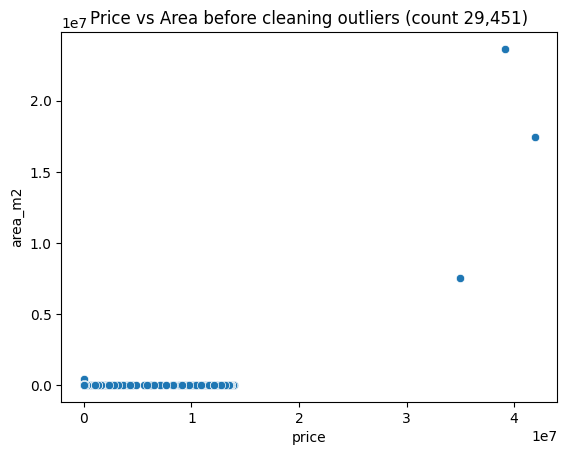

In [20]:
sns.scatterplot(data=df, x="price", y="area_m2")
plt.title(f'Price vs Area before cleaning outliers (count {df.shape[0]:,})')
plt.show()

In [21]:
# There seem to be outliers in price

# Z score
from scipy import stats
import numpy as np

df['z_score'] = np.abs(stats.zscore(df['price']))

In [22]:
''' Detection '''


def clean_with_iqr(data_frame: pd.DataFrame, column: str) -> pd.DataFrame:
    # IQR
    # Calculate the upper and lower limits
    Q1 = data_frame[column].quantile(0.25)
    Q3 = data_frame[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Create arrays of Boolean values indicating the outlier rows
    upper_array = np.where(data_frame[column] >= upper)[0]
    lower_array = np.where(data_frame[column] <= lower)[0]

    # Removing the outliers
    data_frame.drop(index=upper_array, inplace=True)
    data_frame.drop(index=lower_array, inplace=True)
    return data_frame

In [23]:
# outlier_index = df.loc[df['z_score'] > 3.0].index
# df = clean_with_iqr(data_frame=df, column='price')
# df = clean_with_iqr(data_frame=df, column='area_m2')
# df = df.drop(outlier_index)
print(df.shape)
out_area = df.loc[df['area_m2'] >= 10_000.00]
df = df.drop(index=out_area.index)

(29451, 15)


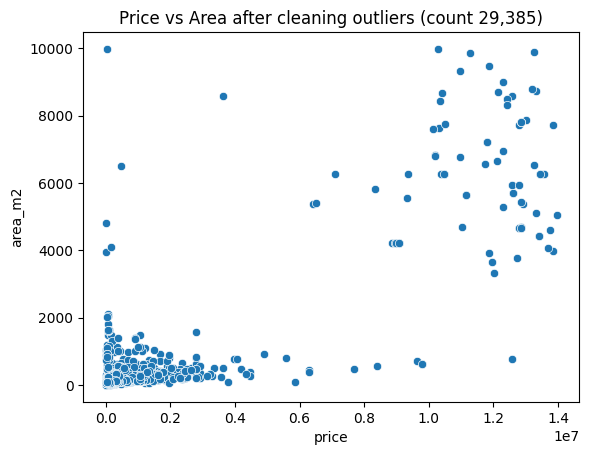

In [24]:
sns.scatterplot(data=df, x="price", y="area_m2")
plt.title(f'Price vs Area after cleaning outliers (count {df.shape[0]:,})')
plt.show()

In [25]:

df.describe()

,under_construction,rera,bhk_no,ready_to_move,resale,longitude,latitude,price,area_m2,posted_by_Builder,posted_by_Dealer,posted_by_Owner,bhk_or_rk_BHK,bhk_or_rk_RK,z_score
count,29385.000000,29385.000000,29385.000000,29385.000000,29385.000000,29385.000000,29385.000000,2.938500e+04,29385.000000,29385.000000,29385.000000,29385.000000,29385.000000,29385.000000,29385.000000
mean,0.179037,0.317339,2.390914,0.820963,0.931291,21.301609,76.834797,1.735212e+05,140.821675,0.020827,0.620827,0.358346,0.999183,0.000817,0.185446
std,0.383390,0.465448,0.879180,0.383390,0.252962,6.201781,10.568335,6.510610e+05,351.925298,0.142807,0.485190,0.479523,0.028568,0.028568,0.685415
min,0.000000,0.000000,1.000000,0.000000,0.000000,-37.713008,-121.761248,3.492500e+02,0.278709,0.000000,0.000000,0.000000,0.000000,0.000000,0.004413
25%,0.000000,0.000000,2.000000,1.000000,1.000000,18.452663,73.798100,5.308600e+04,83.613536,0.000000,0.000000,0.000000,1.000000,0.000000,0.089666
50%,0.000000,0.000000,2.000000,1.000000,1.000000,20.750000,77.323900,8.619490e+04,109.076397,0.000000,1.000000,0.000000,1.000000,0.000000,0.136859
75%,0.000000,1.000000,3.000000,1.000000,1.000000,26.900926,77.824149,1.397000e+05,144.010851,0.000000,1.000000,1.000000,1.000000,0.000000,0.168829
max,1.000000,1.000000,20.000000,1.000000,1.000000,59.912884,152.962676,1.395603e+07,9983.444006,1.000000,1.000000,1.000000,1.000000,1.000000,14.990954
